In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Checking_v.csv', index_col=0)
print(df.shape)
df.head(3)

(225222, 26)


/home/oleh/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,base_price,converted_price,creation_timestamp,currency,customer_id,date,emd_number,flight_date,flight_number,form_of_payment,...,quantity,receipt_url,request_from,segment_id,ssr_sub_type,ssr_type,status,tax,tkne,total_price
0,15.0,15.00,2019-04-01 06:05:30,EUR,30042C0C00003257,2019-04-01,5.668282e+12,2019-04-01,PS114,Credit,...,1,https://receipts.checkin-gurus.com/development...,web,20009C0D00247CF3,RQST,SA,100,0.0,5.662413e+12,15.0
1,6.0,6.00,2019-04-01 06:16:20,EUR,20059C03000735F6,2019-04-01,5.668282e+12,2019-04-02,PS778,Credit,...,1,https://receipts.checkin-gurus.com/production/...,web,20001C03002B5E9B,RQST,SA,100,0.0,5.662413e+12,6.0
2,153.0,5.03,2019-04-01 06:16:23,UAH,20056C1100050A87,2019-04-01,5.668282e+12,2019-04-02,PS720,Credit,...,1,https://receipts.checkin-gurus.com/production/...,web,20031C11001F0F89,RQST,SA,100,0.0,5.662406e+12,153.0


In [7]:
df.columns

Index(['base_price', 'converted_price', 'creation_timestamp', 'currency',
       'customer_id', 'date', 'emd_number', 'flight_date', 'flight_number',
       'form_of_payment', 'gateway_type', 'id', 'is_charter', 'order_id',
       'pnr', 'psp_reference_number', 'quantity', 'receipt_url',
       'request_from', 'segment_id', 'ssr_sub_type', 'ssr_type', 'status',
       'tax', 'tkne', 'total_price'],
      dtype='object')

In [7]:
df.groupby(by=['ssr_sub_type'])['converted_price'].sum()/ df['converted_price'].sum()

ssr_sub_type
ABAG    0.010750
APML    0.000080
BEML    0.000458
BFML    0.000070
BHML    0.000004
BZML    0.000201
CBAG    0.010640
CBML    0.000114
CDML    0.000317
COML    0.000259
CRML    0.000160
DDML    0.000154
FSML    0.000152
GLML    0.000424
HAML    0.000138
HBML    0.000240
HCML    0.000196
HHML    0.000200
HLML    0.000018
HSML    0.000453
KHML    0.000124
KKML    0.001014
KMML    0.000245
KRML    0.000306
LAML    0.000108
LDML    0.000043
LEML    0.000435
LIML    0.000537
LMML    0.000104
LUML    0.000204
MMML    0.000052
PCML    0.000034
PDBG    0.055635
PMML    0.000017
PQML    0.000106
PSML    0.000247
PWML    0.000224
RQST    0.914507
SAML    0.000026
SBML    0.000023
SCML    0.000182
SSML    0.000061
STML    0.000058
SVML    0.000120
VEML    0.000291
VMML    0.000270
Name: converted_price, dtype: float64

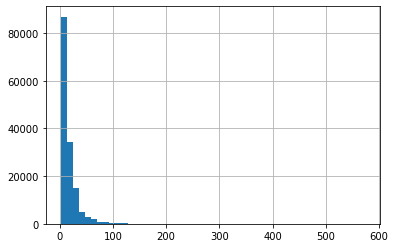

In [10]:
df.groupby(by=['pnr'])['converted_price'].sum().hist(bins=50)

In [11]:
print('median',df.groupby(by=['pnr'])['converted_price'].sum().median())
print('mean',df.groupby(by=['pnr'])['converted_price'].sum().mean())
print('std',df.groupby(by=['pnr'])['converted_price'].sum().std())

median 13.0
mean 16.71947932135365
std 17.299007834030586


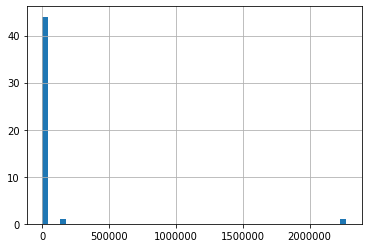

In [13]:
df.groupby(by=['ssr_sub_type'])['converted_price'].sum().hist(bins=50)

In [14]:
df.pnr.nunique()

148825

In [15]:
df_pnr_ssr = pd.pivot_table(df, index=['pnr'], columns=['ssr_sub_type'], values=['converted_price'], 
                       aggfunc='count', fill_value=0)

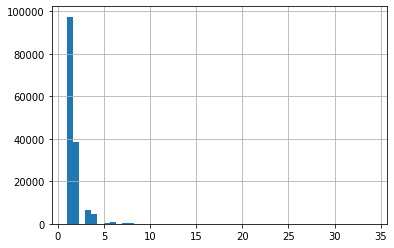

In [16]:
df_pnr_ssr.sum(axis=1).hist(bins=50)

In [17]:
df_pnr_ssr

converted_price                                               \
ssr_sub_type            ABAG APML BEML BFML BHML BZML CBAG CBML CDML COML   
pnr                                                                         
C223WO                     0    0    0    0    0    0    0    0    0    0   
C226IE                     0    0    0    0    0    0    0    0    0    0   
C22APR                     0    0    0    0    0    0    0    0    0    0   
C22AS5                     0    0    0    0    0    0    0    0    0    0   
C22JO6                     0    0    0    0    0    0    0    0    0    0   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
WZZIGH                     0    0    0    0    0    0    0    0    0    0   
WZZL96                     0    0    0    0    0    0    0    0    0    0   
WZZVXT                     0    0    0    0    0    0    0    0    0    0   
WZZXFB                     0    0    0    0    0    0    0    0    0    0   
WZZXY2                     0    0    0    0    0    0    0    0    0    0   

              ...                                                    
ssr_sub_type  ... PWML RQST SAML SBML SCML SSML STML SVML VEML VMML  
pnr           ...                                                    
C223WO        ...    0    1    0    0    0    0    0    0    0    0  
C226IE        ...    0    1    0    0    0    0    0    0    0    0  
C22APR        ...    0    1    0    0    0    0    0    0    0    0  
C22AS5        ...    0    1    0    0    0    0    0    0    0    0  
C22JO6        ...    0    1    0    0    0    0    0    0    0    0  
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
WZZIGH        ...    0    1    0    0    0    0    0    0    0    0  
WZZL96        ...    0    4    0    0    0    0    0    0    0    0  
WZZVXT        ...    0    4    0    0    0    0    0    0    0    0  
WZZXFB        ...    0    1    0    0    0    0    0    0    0    0  
WZZXY2        ...    0    1    0    0    0    0    0    0    0    0  

[148825 rows x 46 columns]

In [18]:
df_pnr = df_pnr_ssr.stack().reset_index()


In [19]:
df_pnr['same_pnr'] = 'NNNNNNNNNN'

In [20]:
df_pnr.head()

,pnr,ssr_sub_type,converted_price,same_pnr
0,C223WO,ABAG,0,NNNNNNNNNN
1,C223WO,APML,0,NNNNNNNNNN
2,C223WO,BEML,0,NNNNNNNNNN
3,C223WO,BFML,0,NNNNNNNNNN
4,C223WO,BHML,0,NNNNNNNNNN


In [21]:
from fastai.collab import *

In [22]:
data = CollabDataBunch.from_df(df_pnr, user_name='same_pnr', item_name='ssr_sub_type', 
                               rating_name='converted_price', seed=42)

In [23]:
max_count = df_pnr['converted_price'].max()

In [24]:
learn = collab_learner(data, n_factors=60, y_range=[0, max_count], wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


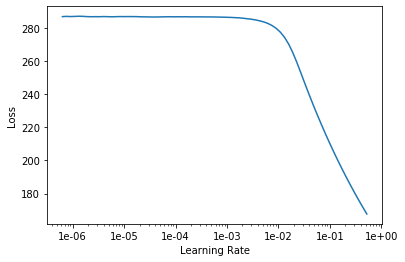

In [25]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(8, 1e-2)

epoch,train_loss,valid_loss,time
0,0.023412,0.024174,04:46
1,0.017864,0.024646,04:26
2,0.018129,0.026394,04:28
3,0.018547,0.024892,04:29
4,0.010991,0.025085,04:26
5,0.019669,0.024293,04:25
6,0.015446,0.024253,04:25
7,0.052465,0.024173,04:26


In [27]:
pnr_emb = learn.model.u_weight.weight.detach().numpy()

In [28]:
ssr_emb = learn.model.i_weight.weight.detach().numpy()

In [29]:
ssr_emb.shape, pnr_emb.shape

((47, 60), (2, 60))

In [30]:
from sklearn.manifold import TSNE

In [31]:
tSNE = TSNE(n_components=2, perplexity=10.0, n_iter=1000, verbose=1)
ssr_features = tSNE.fit(ssr_emb)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 47 samples in 0.000s...
[t-SNE] Computed neighbors for 47 samples in 0.354s...
[t-SNE] Computed conditional probabilities for sample 47 / 47
[t-SNE] Mean sigma: 0.015598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.673641
[t-SNE] KL divergence after 1000 iterations: 0.130234


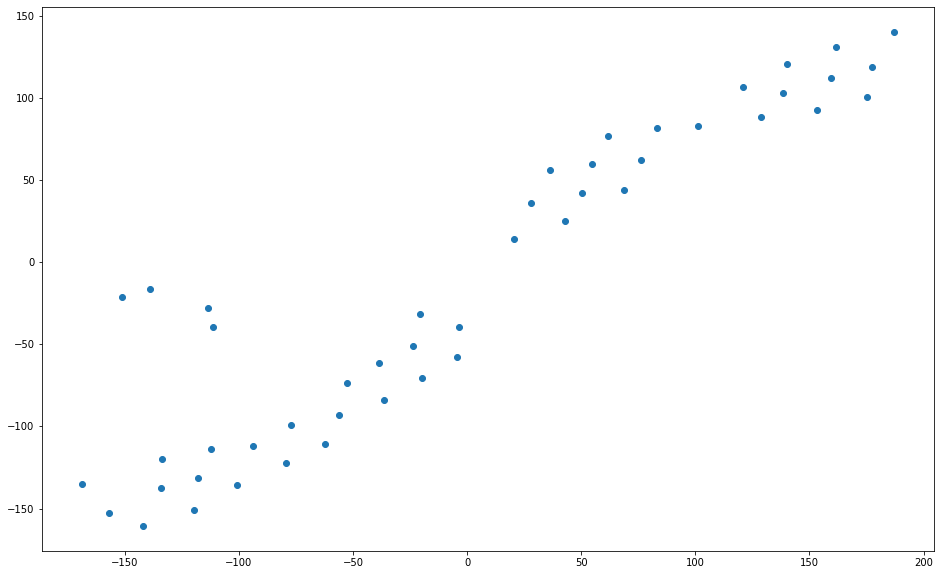

In [32]:
plt.figure(figsize=(16,10))
plt.scatter(ssr_features.embedding_[:,0], ssr_features.embedding_[:,1])

In [33]:
from sklearn.mixture import BayesianGaussianMixture

In [34]:
bgm = BayesianGaussianMixture(n_components=5, covariance_type='diag')

In [35]:
ssr_bgm = bgm.fit_predict(ssr_emb)

In [36]:
l, l_fr = np.unique(ssr_bgm, return_counts=True)

In [37]:
l

array([0, 1, 3])

In [38]:
l_fr

array([43,  3,  1])

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
ssr_pca = pca.fit_transform(ssr_emb)

In [42]:
pca.explained_variance_ratio_

array([1.000000e+00, 1.063949e-12], dtype=float32)

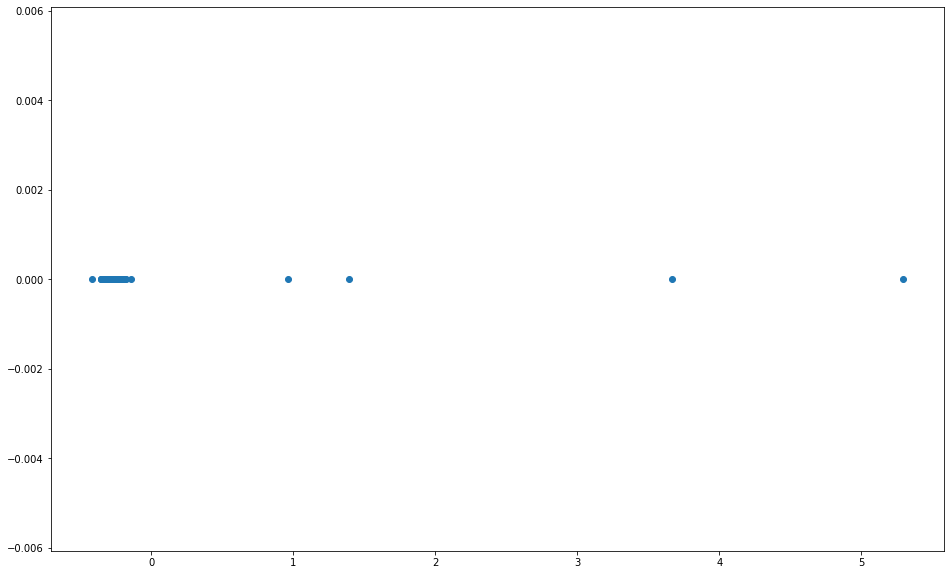

In [43]:
plt.figure(figsize=(16,10))
plt.scatter(ssr_pca[:,0], ssr_pca[:,1])

In [44]:
u_id, i_id =data.train_ds.x.classes.values()
user_dict = {v:k for k,v in enumerate(u_id)}
prod_dict = {v:k for k,v in enumerate(i_id)}

In [45]:
item_bias = learn.model.i_bias.weight.detach().cpu().numpy()

In [46]:
item_bias = [(b, k) for b,k in zip(item_bias,prod_dict)]

In [47]:
sorted(item_bias, reverse=True, key=lambda x: x[0] )

[(array([-7.e-43], dtype=float32), '#na#'),
 (array([-0.215763], dtype=float32), 'RQST'),
 (array([-0.504938], dtype=float32), 'PDBG'),
 (array([-0.560616], dtype=float32), 'CBAG'),
 (array([-0.764903], dtype=float32), 'ABAG'),
 (array([-1.13028], dtype=float32), 'KKML'),
 (array([-1.818411], dtype=float32), 'GLML'),
 (array([-1.8401], dtype=float32), 'LIML'),
 (array([-1.928641], dtype=float32), 'HSML'),
 (array([-1.944486], dtype=float32), 'BEML'),
 (array([-1.973306], dtype=float32), 'PWML'),
 (array([-2.012849], dtype=float32), 'CDML'),
 (array([-2.022392], dtype=float32), 'KRML'),
 (array([-2.030144], dtype=float32), 'VMML'),
 (array([-2.031185], dtype=float32), 'LEML'),
 (array([-2.061167], dtype=float32), 'VEML'),
 (array([-2.074462], dtype=float32), 'COML'),
 (array([-2.118009], dtype=float32), 'BZML'),
 (array([-2.133389], dtype=float32), 'HHML'),
 (array([-2.135133], dtype=float32), 'KMML'),
 (array([-2.144387], dtype=float32), 'KHML'),
 (array([-2.151592], dtype=float32), 'S

In [48]:
from sklearn.metrics import pairwise_distances 

In [49]:
def close_prod(prod, prod_dict, ssr_emb=ssr_emb, n=5):
    """
    serve to give the most closely products to the given product
    """
    dist = pairwise_distances(ssr_emb, ssr_emb)
    dist_prod = [(v, k) for v,k in zip(dist[prod_dict[prod]], prod_dict)]
    return sorted(dist_prod, key=lambda x: x[0])[1:n+1]

In [50]:
close_prod('KMML', prod_dict, ssr_emb)

[(0.00012327272, 'KRML'),
 (0.0010872931, 'HHML'),
 (0.006483591, 'VMML'),
 (0.01923978, 'KKML'),
 (0.02051729, 'CDML')]

In [51]:
close_prod('RQST', prod_dict, ssr_emb)

[(1.622998, '#na#'),
 (2.2779543, 'PDBG'),
 (2.7076097, 'CBAG'),
 (3.8108535, 'ABAG'),
 (3.848726, 'BHML')]